# Suicide analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Reading the data

In [3]:
df = pd.read_csv('master.csv')

Let's take a look at the data:

In [4]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
12171,Ireland,1994,female,15-24 years,13,303000,4.29,Ireland1994,NaN,"57,166,037,102",17188,Generation X
11049,Guatemala,2014,female,5-14 years,13,1906536,0.68,Guatemala2014,0.627,"58,722,323,918",4210,Generation Z
23290,South Africa,1996,male,35-54 years,36,4031071,0.89,South Africa1996,NaN,"147,607,982,695",3908,Boomers
7902,Ecuador,2002,male,55-74 years,39,525419,7.42,Ecuador2002,NaN,"28,548,945,000",2472,Silent
5936,Colombia,2010,male,75+ years,65,418296,15.54,Colombia2010,0.706,"287,018,184,638",6836,Silent


In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


The dataset has data from suicides from 1985 to 2016.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


is there null data?

In [7]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Understanding the data

The country-year field displays the country name and year of the record. In this way, it is a redundant field and will be discarded. Also due to most data from the 'HDI for year' field, it will be discarded.

In [8]:
df.drop(['country-year', 'HDI for year'], inplace=True, axis = 1)

Let's rename some columns simply to make it easier to access them.

In [9]:
df = df.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'})

In this case, the 'gdp_for_year' field is as a string, so let's convert this to a number.

In [10]:
for i, x in enumerate(df['gdp_for_year']):
    df['gdp_for_year'][i] = x.replace(',', '')
    
df['gdp_for_year'] = df['gdp_for_year'].astype('int64')

/home/luis/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Data Description

Each data in the data set represents a year, a country, a certain age range, and a gender. For example, in the country Brazil in the year 1985, over 75 years, committed suicide 129 men.

The data set has 10 attributes. These being:

- Country: country of record data;
- Year: year of record data;
- Sex: Sex (male or female);
- Age: Suicide age range, ages divided into six categories;
- Suicides_no: number of suicides;
- Population: population of this sex, in this age range, in this country and in this year;
- Suicides / 100k pop: Reason between the number of suicides and the population / 100k;
- GDP_for_year: GDP of the country in the year who issue;
- GDP_per_capita: ratio between the country's GDP and its population;
- Generation: Generation of the suicides in question, being possible 6 different categories.

Possible age categories and generations are:

In [11]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [12]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

## Adding some things

As the HDI was discarded and it is very interesting to assess whether the development of the country has an influence on the suicide rate, I have separated a list of first and second world countries from the data of the site:

http://worldpopulationreview.com

Then I categorized each country in the data set into first, second and third world.

In [13]:
Frist_world = ['United States', 'Germany', 'Japan', 'Turkey', 'United Kingdom', 'France', 'Italy', 'South Korea',
              'Spain', 'Canada', 'Australia', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 
              'Sweden', 'Austria', 'Switzerland', 'Israel', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Ireland',
              'New Zeland', 'Slovenia', 'Estonia', 'Cyprus', 'Luxembourg', 'Iceland']

Second_world = ['Russian Federation', 'Ukraine', 'Poland', 'Uzbekistan', 'Romania', 'Kazakhstan', 'Azerbaijan', 'Czech Republic',
               'Hungary', 'Belarus', 'Tajikistan', 'Serbia', 'Bulgaria', 'Slovakia', 'Croatia', 'Maldova', 'Georgia',
               'Bosnia And Herzegovina', 'Albania', 'Armenia', 'Lithuania', 'Latvia', 'Brazil', 'Chile', 'Argentina',
               'China', 'India', 'Bolivia', 'Romenia']

In [46]:
country_world = []
for i in range(len(df)):
    
    if df['country'][i] in Frist_world:
        country_world.append('1')
    elif df['country'][i] in Second_world:
        country_world.append('2')
    else:
        country_world.append('3')

df['country_world'] = country_world

# Exploratory analysis

I will analyze the impact of some attributes on the amount of suicides. We start this year.

#### Year

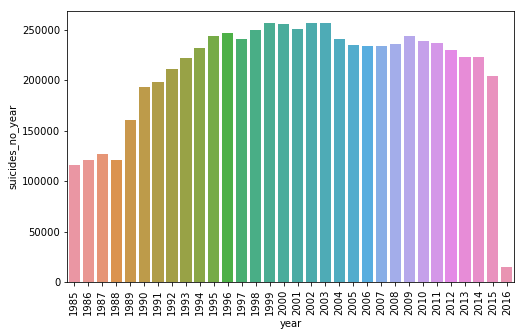

In [15]:
suicides_no_year = []

for y in df['year'].unique():
    suicides_no_year.append(sum(df[df['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = df['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

#### Age

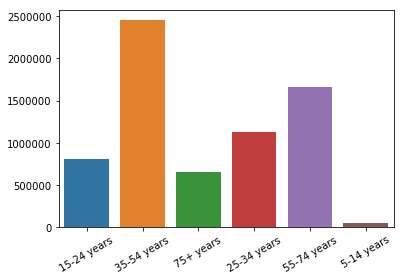

In [16]:
suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_no_age)

#### Sex

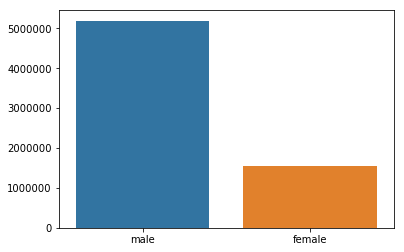

In [17]:
suicides_no_sex = []

for s in df['sex'].unique():
    suicides_no_sex.append(sum(df[df['sex'] == s]['suicides_no']))

sns.barplot(x = df['sex'].unique(), y = suicides_no_sex)

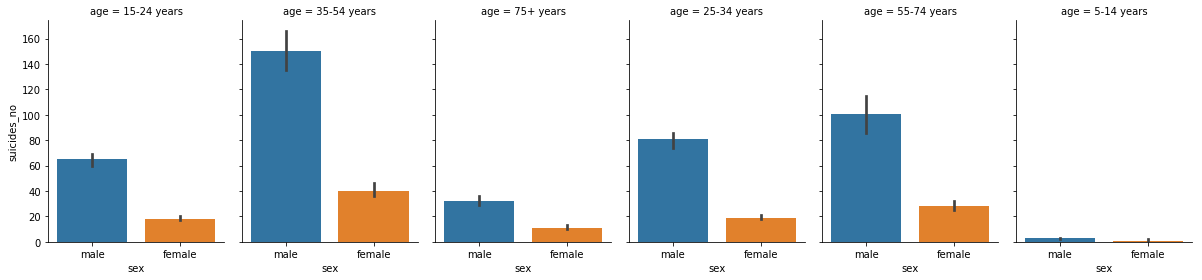

In [18]:
sns.catplot(x='sex', y='suicides_no',col='age', data=df, estimator=np.median,height=4, aspect=.7,kind='bar')

#### Country

Countries with larger populations should have more suicides.

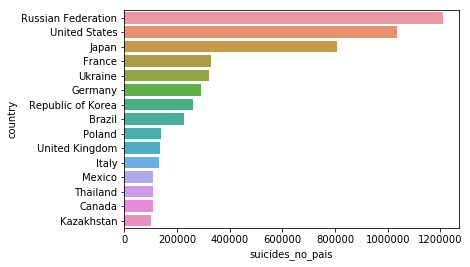

In [19]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides_no']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

By using the amount of suicides per 100k inhabitants, we remove the bias of overpopulated countries.

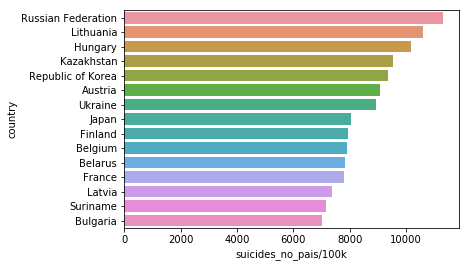

In [20]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides/100k pop']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais/100k'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['suicides_no_pais/100k'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

#### Generation

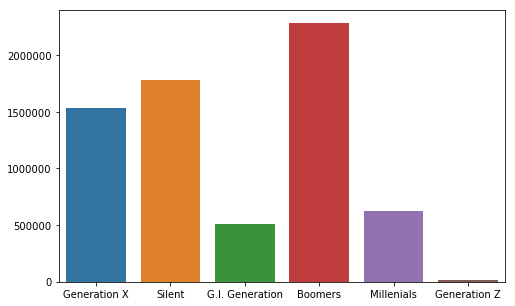

In [21]:
suicides_no_gen = []
for g in df['generation'].unique():
    suicides_no_gen.append(sum(df[df['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sns.barplot(x = df['generation'].unique(), y = suicides_no_gen)

#### Country world

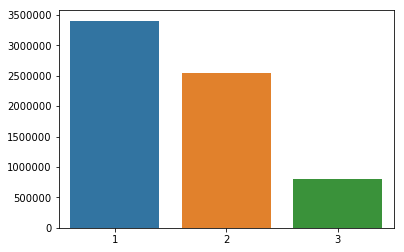

In [49]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides_no']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

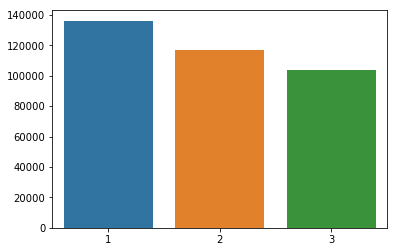

In [48]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides/100k pop']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

#### GDP for year

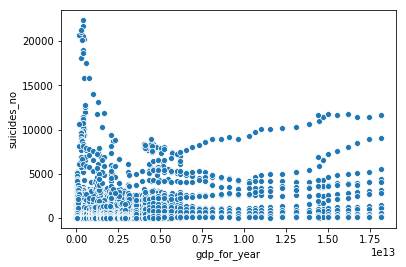

In [24]:
sns.scatterplot(x = 'gdp_for_year', y = 'suicides_no', data = df)

#### GDP por capita

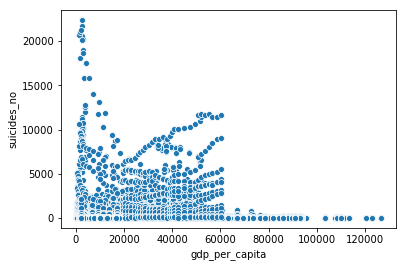

In [25]:
sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', data = df)

### Attribute Correlation

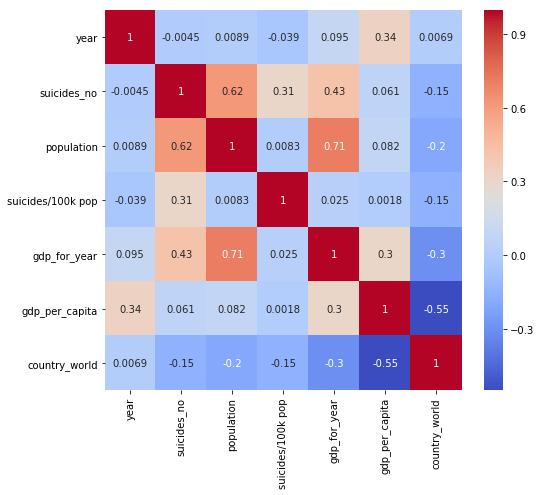

In [26]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

# Checking the suicidade/100k distribution of some countries

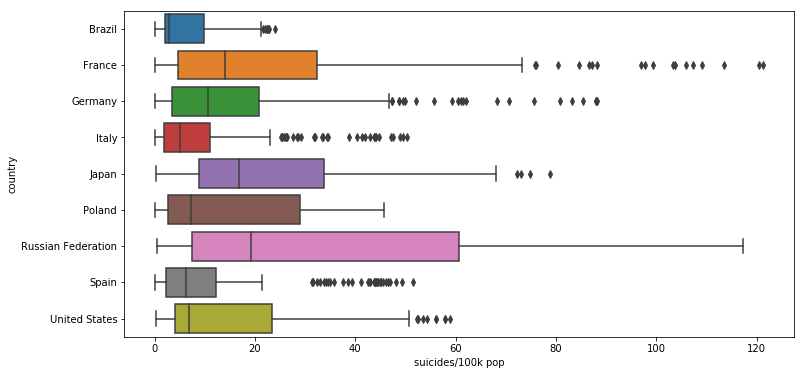

In [68]:
countries = ['Russian Federation', 'Brazil', 'Poland', 'Italy', 'United States', 'Germany', 'Japan', 'Spain', 'France']
df_filtred = df[[df['country'][i] in countries for i in range(len(df))]]

plt.figure(figsize=(12,6))
sns.boxplot(x = 'suicides/100k pop', y = 'country', data = df_filtred)

### General Plot of the World

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [28]:
init_notebook_mode(connected=True) 

In [29]:
cod = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [30]:
codes = []
for i in range(len(n_suicides_pais)):
    c = n_suicides_pais['country'][i]
    f = 0
    for j in range(len(cod)):
        if c == cod['COUNTRY'][j]:
            tmp = cod['CODE'][j]
            f = 1
            break
    if f == 0:
        if c == 'Bahamas':
            tmp  = 'BHM'
        elif c == 'Republic of Korea':
            tmp = 'KOR'
        elif c == 'Russian Federation':
            tmp = 'RUS'
        else:
            tmp = 'VC'
    codes.append(tmp)

In [31]:
data = dict(
        type = 'choropleth',
        locations = codes,
        z = n_suicides_pais['suicides_no_pais/100k'],
        text = n_suicides_pais['country'],
        colorbar = {'title' : 'número de suicídios'},
      )

In [32]:
layout = dict(
    title = 'Mapa de calor de suicídios 1985-2016',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'}
    )
)

In [33]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

## Brazil Facts

As a Brazilian, I have a particular interest in the suicide rate in Brazil. So I'm going to try to analyze the specific indices of this country.

In [34]:
df_brasil = df[df['country'] == 'Brazil']

Country and country fields are all the same, then discarded.

In [35]:
df_brasil.drop(['country', 'country_world'], axis = 1, inplace = True)

/home/luis/anaconda3/envs/dl/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



I'm going to repeat a lot of the graphics already done.

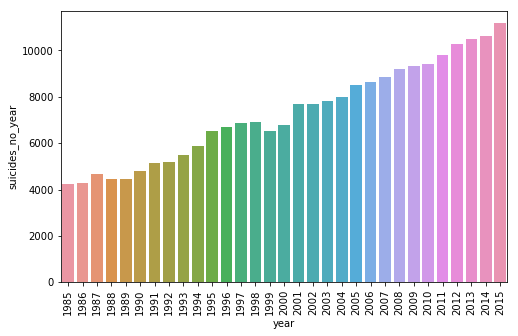

In [36]:
suicides_no_year = []

for y in df_brasil['year'].unique():
    suicides_no_year.append(sum(df_brasil[df_brasil['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = df_brasil['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

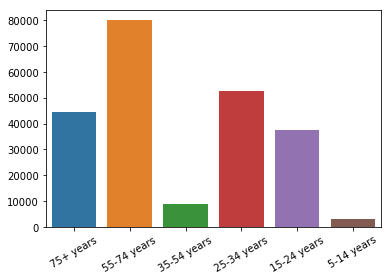

In [37]:
suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df_brasil[df_brasil['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df_brasil['age'].unique(), y = suicides_no_age)

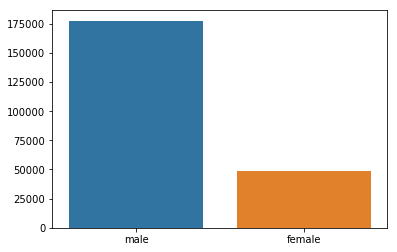

In [38]:
suicides_no_sex = []

for s in df['sex'].unique():
    suicides_no_sex.append(sum(df_brasil[df_brasil['sex'] == s]['suicides_no']))

sns.barplot(x = df_brasil['sex'].unique(), y = suicides_no_sex)

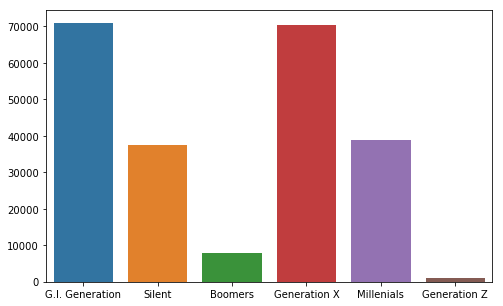

In [39]:
suicides_no_gen = []
for g in df['generation'].unique():
    suicides_no_gen.append(sum(df_brasil[df_brasil['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sns.barplot(x = df_brasil['generation'].unique(), y = suicides_no_gen)

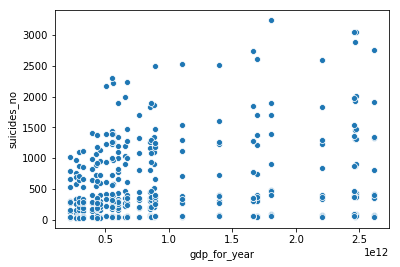

In [40]:
sns.scatterplot(x = 'gdp_for_year', y = 'suicides_no', data = df_brasil)

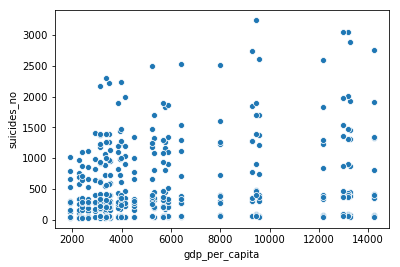

In [41]:
sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', data = df_brasil)

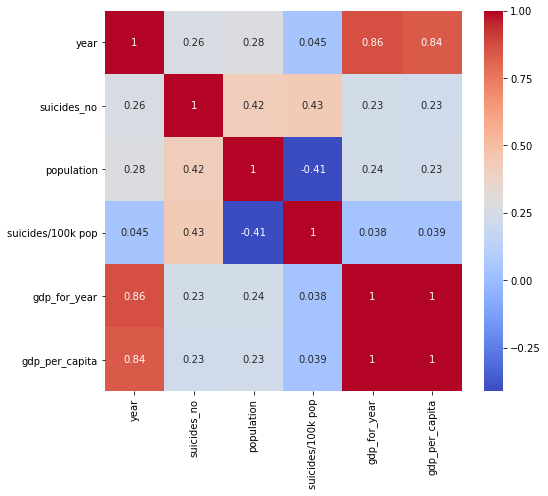

In [42]:
plt.figure(figsize=(8,7))
sns.heatmap(df_brasil.corr(), cmap = 'coolwarm', annot=True)

In [43]:
df_brasil = df_brasil.drop(['year', 'sex', 'generation','age', 'country'], axis = 1)

KeyError: "['country'] not found in axis"

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
y = df_brasil['suicides_no']
X = df_brasil.drop(['suicides_no', ' gdp_for_year ($) ', 'HDI for year', 'country-year'], axis = 1)

In [35]:
y=(y-y.min())/(y.max()-y.min())

In [36]:
y

4172    0.032369
4173    0.158730
4174    0.306878
4175    0.238406
4176    0.197946
4177    0.002179
4178    0.038282
4179    0.075941
4180    0.084345
4181    0.079365
4182    0.004980
4183    0.003112
4184    0.024276
4185    0.173047
4186    0.293184
4187    0.226891
4188    0.205415
4189    0.002490
4190    0.042951
4191    0.096483
4192    0.095238
4193    0.072207
4194    0.003112
4195    0.000622
4196    0.038593
4197    0.193589
4198    0.334578
4199    0.261438
4200    0.214130
4201    0.053533
          ...   
4514    0.126984
4515    0.019608
4516    0.114535
4517    0.104886
4518    0.014628
4519    0.007781
4520    0.113601
4521    0.469655
4522    0.941488
4523    0.609088
4524    0.414877
4525    0.263305
4526    0.113290
4527    0.134454
4528    0.018052
4529    0.107688
4530    0.018363
4531    0.011516
4532    0.138500
4533    0.519141
4534    1.000000
4535    0.582633
4536    0.424525
4537    0.275444
4538    0.141301
4539    0.137255
4540    0.019919
4541    0.1157

In [21]:
scaler = MinMaxScaler()
X, y = scaler.fit_transform(X,y)

ValueError: could not convert string to float: 'Brazil'